In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import dataframe_image as dfi
from scipy.stats import norm

df=pd.read_csv('house_price_regression_dataset.csv')
dfi.export(df,'first_table.png',max_rows=10)
df

Square_Footage  Num_Bedrooms  Num_Bathrooms  Year_Built  Lot_Size  \
0              1360             2              1        1981  0.599637   
1              4272             3              3        2016  4.753014   
2              3592             1              2        2016  3.634823   
3               966             1              2        1977  2.730667   
4              4926             2              1        1993  4.699073   
..              ...           ...            ...         ...       ...   
995            3261             4              1        1978  2.165110   
996            3179             1              2        1999  2.977123   
997            2606             4              2        1962  4.055067   
998            4723             5              2        1950  1.930921   
999            3268             4              2        1983  3.108790   

     Garage_Size  Neighborhood_Quality  House Price  Cheap 0 Expensive 1  
0              0                     5    262382.85                    0  
1              1                     6    985260.85                    1  
2              0                     9    777977.39                    1  
3              1                     8    229698.92                    0  
4              0                     8   1041740.86                    1  
..           ...                   ...          ...                  ...  
995            2                    10    701494.00                    1  
996            1                    10    683723.16                    1  
997            0                     2    572024.02                    0  
998            0                     7    964865.30                    1  
999            2                     2    742599.25                    1  

[1000 rows x 9 columns]

Square_Footage            2815.422000
Num_Bedrooms                 2.990000
Num_Bathrooms                1.973000
Year_Built                1986.550000
Lot_Size                     2.778087
Garage_Size                  1.022000
Neighborhood_Quality         5.615000
House Price             618861.018640
Cheap 0 Expensive 1          0.516000
dtype: float64 

The Mean House Price: $618,861.02 

Special Comment: Anything above the average price is considered "Expensive or 1", and anything below "Cheap or 0"


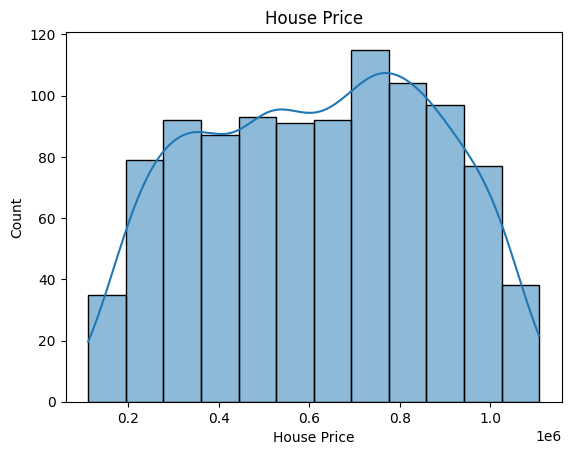

In [3]:
print(df.mean(),'\n')
print('The Mean House Price:','${:,.2f}'.format(df['House Price'].mean()),'\n')
print('Special Comment: Anything above the average price is considered "Expensive or 1", and anything below "Cheap or 0"')

sns.histplot(df['House Price'], kde=True)
plt.title('House Price')
plt.rcParams['axes.facecolor'] = 'black'
plt.show()

In [4]:
A=df.iloc[:,0:7]
AA=df.iloc[:,0:8]
C=df.iloc[:,7:8]
D=df.iloc[:,8:9]

pd.concat([AA,D])

X=np.array(A)
y=np.array(C).reshape(len(X))
y_target=np.array(D).reshape(len(X))

#Train the Data before standardizing for Logisitic Regression & Predictions & for LS Predictions
X_train_svd, X_test_svd, y_train_svd, y_test_svd = train_test_split(X, y, test_size=0.2, random_state=42)#y=house prices
X_train, X_test, y_train, y_test = train_test_split(X, y_target, test_size=0.2, random_state=42) # y_target = Cheap or Expensive

columns_keep_logistic=A.columns.tolist()

first=pd.DataFrame(X_train,columns=[columns_keep_logistic])
second=pd.DataFrame(y_train,columns=['Cheap 0 Expensive 1'])
third = pd.DataFrame(y_train_svd,columns=['House Price'])

first_test=pd.DataFrame(X_test,columns=[columns_keep_logistic])
second_test=pd.DataFrame(y_test,columns=['Cheap 0 Expensive 1'])
third_test = pd.DataFrame(y_test_svd,columns=['House Price'])

AB=pd.concat([first,third,second],axis=1)

AB_test=pd.concat([first_test,third_test,second_test],axis=1)

AB

(Square_Footage,)  (Num_Bedrooms,)  (Num_Bathrooms,)  (Year_Built,)  \
0               2028.0              2.0               3.0         1967.0   
1               3519.0              5.0               3.0         1966.0   
2               4507.0              2.0               3.0         2014.0   
3               3371.0              4.0               2.0         2000.0   
4               2871.0              5.0               1.0         1974.0   
..                 ...              ...               ...            ...   
795             2257.0              5.0               1.0         1968.0   
796             3894.0              3.0               2.0         1975.0   
797             1484.0              5.0               1.0         2010.0   
798             1865.0              4.0               2.0         1994.0   
799             1363.0              4.0               1.0         1977.0   

     (Lot_Size,)  (Garage_Size,)  (Neighborhood_Quality,)  House Price  \
0       1.784790             2.0                      2.0    434165.90   
1       4.009947             0.0                     10.0    788284.69   
2       4.122337             0.0                      7.0    985499.20   
3       1.580318             0.0                      1.0    736289.12   
4       3.426914             2.0                      6.0    636552.75   
..           ...             ...                      ...          ...   
795     3.131006             0.0                      2.0    501305.55   
796     1.256532             0.0                      5.0    797034.43   
797     1.246555             1.0                      6.0    360372.98   
798     4.354220             0.0                      7.0    478566.07   
799     4.408878             1.0                      1.0    340069.23   

     Cheap 0 Expensive 1  
0                      0  
1                      1  
2                      1  
3                      1  
4                      1  
..                   ...  
795                    0  
796                    1  
797                    0  
798                    0  
799                    0  

[800 rows x 9 columns]

STANDARDIZE THE DATA SET

In [5]:
df_standardized=(df.iloc[:,0:7]-df.iloc[:,0:7].mean())/df.iloc[:,0:7].std()
standard=np.array(df_standardized)
df_standardized

Square_Footage  Num_Bedrooms  Num_Bathrooms  Year_Built  Lot_Size  \
0         -1.159223     -0.693489      -1.186106   -0.268988 -1.678439   
1          1.160144      0.007005       1.251933    1.427331  1.521629   
2          0.618533     -1.393983       0.032914    1.427331  0.660092   
3         -1.473039     -1.393983       0.032914   -0.462853 -0.036536   
4          1.681046     -0.693489      -1.186106    0.312607  1.480068   
..              ...           ...            ...         ...       ...   
995        0.354897      0.707499      -1.186106   -0.414386 -0.472283   
996        0.289585     -1.393983       0.032914    0.603405  0.153352   
997       -0.166802      0.707499       0.032914   -1.189846  0.983879   
998        1.519359      1.407993       0.032914   -1.771441 -0.652719   
999        0.360472      0.707499       0.032914   -0.172055  0.254798   

     Garage_Size  Neighborhood_Quality  
0      -1.254030             -0.213020  
1      -0.026995              0.133354  
2      -1.254030              1.172473  
3      -0.026995              0.826100  
4      -1.254030              0.826100  
..           ...                   ...  
995     1.200040              1.518847  
996    -0.026995              1.518847  
997    -1.254030             -1.252139  
998    -1.254030              0.479727  
999     1.200040             -1.252139  

[1000 rows x 7 columns]

In [6]:
XS_svd_y=((y_train_svd-np.mean(y_train_svd))/(np.std(y_train_svd)))
XS_svd_x=((X_train_svd-np.mean(X_train_svd))/(np.std(X_train_svd)))

cov=np.cov(XS_svd_x.T)
covdf=pd.DataFrame(cov,columns=[columns_keep_logistic])

In [7]:
XS_svd_x.shape

(800, 7)

In [8]:
y_train_svd.shape

(800,)

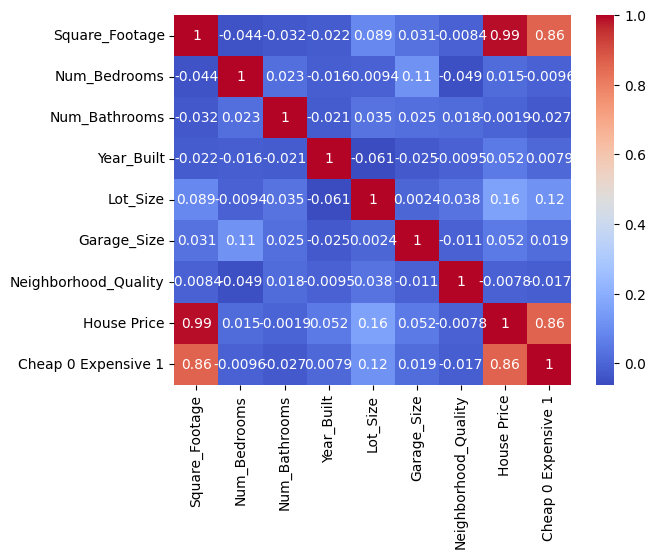

In [9]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.rcParams['axes.facecolor'] = 'black'
plt.show()

Define PCA function

In [10]:
U,S,Vt=np.linalg.svd(cov)
indices=np.argsort(S)
PCA=pd.DataFrame(S[indices],index=[columns_keep_logistic],columns=['EigenValue Test'])
print('There is no need for PCA since we only have one feature that is highly correlated')
PCA

There is no need for PCA since we only have one feature that is highly correlated


EigenValue Test
Square_Footage           4.443118e-07
Num_Bedrooms             4.637670e-07
Num_Bathrooms            1.118458e-06
Year_Built               1.406540e-06
Lot_Size                 5.881786e-06
Garage_Size              2.992967e-04
Neighborhood_Quality     1.085407e+00

In [11]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

class LogisticRegression():

    def __init__(self, lr=0.01, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            linear_pred = np.dot(X, self.weights) + self.bias
            predictions = sigmoid(linear_pred)

            dw = (1/n_samples) * np.dot(X.T, (predictions - y))
            db = (1/n_samples) * np.sum(predictions-y)

            self.weights = self.weights - self.lr*dw
            self.bias = self.bias - self.lr*db

    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_pred)
        class_pred = [0 if y<=0.5 else 1 for y in y_pred]
        return np.round(y_pred,8),self.weights,self.bias

tr=LogisticRegression()
tr.fit(X_train,y_train)
y_pred,w,b=tr.predict(X_test)
print('Weights:',np.round(w,1))
print('Bias:',np.round(b,2))

Weights: [ 12.1   0.2  -0.  -17.1   0.2   0.   -0.2]
Bias: -0.01


/var/folders/gd/kjs7tjqd6wlgv4ndklv1lhsh0000gn/T/ipykernel_46843/2777835779.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


In [12]:
pd.concat([AB_test,pd.DataFrame(y_pred,columns=['Predicted Values'])],axis=1)

(Square_Footage,)  (Num_Bedrooms,)  (Num_Bathrooms,)  (Year_Built,)  \
0               4012.0              3.0               1.0         2016.0   
1               2310.0              3.0               1.0         1988.0   
2               4708.0              1.0               3.0         1962.0   
3               4932.0              2.0               1.0         1972.0   
4               3646.0              1.0               1.0         1994.0   
..                 ...              ...               ...            ...   
195             3767.0              5.0               3.0         1981.0   
196              616.0              2.0               3.0         1965.0   
197             4491.0              4.0               2.0         1994.0   
198             1858.0              1.0               1.0         1996.0   
199             3195.0              1.0               1.0         1962.0   

     (Lot_Size,)  (Garage_Size,)  (Neighborhood_Quality,)  House Price  \
0       2.098092             1.0                      5.0    901000.49   
1       1.369622             1.0                      4.0    494537.51   
2       1.792970             1.0                      8.0    949404.20   
3       4.479598             1.0                      2.0   1040389.05   
4       3.980987             0.0                      9.0    794010.02   
..           ...             ...                      ...          ...   
195     1.520335             2.0                      4.0    824529.57   
196     3.461372             1.0                      7.0    180393.63   
197     3.399155             0.0                      4.0    965816.67   
198     4.546672             2.0                      8.0    433664.23   
199     3.913258             2.0                      1.0    663904.99   

     Cheap 0 Expensive 1  Predicted Values  
0                      1               1.0  
1                      0               0.0  
2                      1               1.0  
3                      1               1.0  
4                      1               1.0  
..                   ...               ...  
195                    1               1.0  
196                    0               0.0  
197                    1               1.0  
198                    0               0.0  
199                    1               1.0  

[200 rows x 10 columns]

In [13]:
test=np.array([3000,4,2,2020,3.13,2,10])

print('The House will be:',np.round(sigmoid(np.dot(test.T,w)+b),4))
print('Cheap if 0, Expensive if 1')

Testframe=pd.DataFrame(test,index=['SQFT','Bedroooms','Bathrooms','Year Built','Lot Size','Garage Size','Neirborhood Quality'],columns=['Home'])
print(Testframe,'\n')

The House will be: 1.0
Cheap if 0, Expensive if 1
                        Home
SQFT                 3000.00
Bedroooms               4.00
Bathrooms               2.00
Year Built           2020.00
Lot Size                3.13
Garage Size             2.00
Neirborhood Quality    10.00 



In [14]:
class leastsquares():

    def __init__(self):
        self.x_fit= None

    def least_squares_x(self,A,b):
        U,S,VT=np.linalg.svd(A) #Define the SVD of the formula
        sigma=np.zeros_like(A.T,dtype=float)
        np.fill_diagonal(sigma,1/S) #the inverse of the symmetric matrix
        self.x_fit=VT.T@sigma@U.T@b
        return self.x_fit #these are the variables that will best fit a line given the information above

    def prediction_ls(self,A):
        y_pred_svd=np.dot(A,self.x_fit)
        return y_pred_svd

ls=leastsquares()
xs=ls.least_squares_x(X_train_svd,y_train_svd)
#make the prediction using Training Data
final=np.round(ls.prediction_ls(X_test_svd),2)

pd.concat([AB_test,pd.DataFrame(final,columns=['Predictions USD'])],axis=1)

xs

array([ 1.98833851e+02,  9.67266489e+03,  7.63646422e+03, -1.33150824e+01,
        1.38874988e+04,  3.67944907e+03, -4.53770428e+01])

In [15]:
test=np.array([4000,4,2,1950,4.13,2,10])
y_predictions_home_price=np.dot(test,xs)
error= (1/len(y_test_svd))*(np.sum(np.pow((final-y_test_svd),2)))
error_log= -np.mean(y_test* np.log(y_pred)+(1-y_test)*np.log(1 - y_pred))
error_log_ls= np.mean(np.pow((y_pred-y_test),2))
error_total = error/sum(y_test_svd)

print('The House will be:',np.round(sigmoid(np.dot(test.T,w)+b),4))
print('Cheap if 0, Expensive if 1','\n')

Testframe=pd.DataFrame(test,index=['SQFT','Bedroooms','Bathrooms','Year Built','Lot Size','Garage Size','Neirborhood Quality'],columns=['Home'])
print(Testframe,'\n')

print('Given the Following:')
print("The Expected Price:",'${:,.2f}'.format(y_predictions_home_price),'\n')
print("The Error Given the Linear Regression:",'{:,.2f}'.format(np.round(error,2)))
print("Although it appears high, this error represents",'{:,.2f}%'.format(error_total),"of the entire sum of our House Price (Test)")
print("The Error Given the Logistic Regression:",'{:,.2f}'.format(np.round(error_log,2)))
print("The Error Given the Logistic Regression (LS):",'{:,.2f}'.format((error_log_ls),4),'\n')

The House will be: 1.0
Cheap if 0, Expensive if 1 

                        Home
SQFT                 4000.00
Bedroooms               4.00
Bathrooms               2.00
Year Built           1950.00
Lot Size                4.13
Garage Size             2.00
Neirborhood Quality    10.00 

Given the Following:
The Expected Price: $887,595.08 

The Error Given the Linear Regression: 496,298,542.70
Although it appears high, this error represents 4.00% of the entire sum of our House Price (Test)
The Error Given the Logistic Regression: nan
The Error Given the Logistic Regression (LS): 0.01 



/var/folders/gd/kjs7tjqd6wlgv4ndklv1lhsh0000gn/T/ipykernel_46843/1334576772.py:4: RuntimeWarning: divide by zero encountered in log
  error_log= -np.mean(y_test* np.log(y_pred)+(1-y_test)*np.log(1 - y_pred))
/var/folders/gd/kjs7tjqd6wlgv4ndklv1lhsh0000gn/T/ipykernel_46843/1334576772.py:4: RuntimeWarning: invalid value encountered in multiply
  error_log= -np.mean(y_test* np.log(y_pred)+(1-y_test)*np.log(1 - y_pred))


In [16]:
sft_variable=X_train_svd[:,0].reshape(len(X_train_svd),1)
House_Price_Tar=y_train_svd.reshape(len(X_train_svd),1)

sft_variable1=X_train_svd[:,0]
House_Price_Tar1=y_train_svd

In [17]:
def linear_regression(x,y1):
    
    lr=.0000000001
    iter=50000
    m=200
    b=50000
    n=len(x) # number of samples
    #define the equation y=mx+b
    
    for _ in range(iter):
        y_hat= np.dot(x,m)+b
        cost= np.sum((np.pow((y1-y_hat),2)))/n
    
        #define the gradients within the function
        md= -2*(np.dot(x.T,(y1-y_hat)))
        bd= np.sum(-2*(y1-y_hat))
        
        #update the slope and bias   
        m= m - (md*lr)
        b= b- (bd*lr)
        print("Slope: {},Intercept: {}, Cost: {}".format(m,b,cost))
    
    return m,b

slope1,intercept=linear_regression(sft_variable1,House_Price_Tar1)


Slope: 202.749184840794,Intercept: 50000.00092736869, Cost: 1161077451.96034
Slope: 201.32598477637399,Intercept: 50000.00061698823, Cost: 1138293840.5946739
Slope: 202.06274797369088,Intercept: 50000.00094736665, Cost: 1132187984.4242086
Slope: 201.6813398138487,Intercept: 50000.00094603654, Cost: 1130551655.534815
Slope: 201.87878741795393,Intercept: 50000.00111642554, Cost: 1130113130.1796758
Slope: 201.77657254786874,Intercept: 50000.001197918864, Cost: 1129995608.1916592
Slope: 201.82948716604423,Intercept: 50000.00132543176, Cost: 1129964112.9674294
Slope: 201.80209423756068,Intercept: 50000.00142912121, Cost: 1129955672.342764
Slope: 201.81627497842075,Intercept: 50000.00154514359, Cost: 1129953410.197186
Slope: 201.80893383180455,Intercept: 50000.001654781445, Cost: 1129952803.8428407
Slope: 201.81273415159853,Intercept: 50000.00176772444, Cost: 1129952641.2295148
Slope: 201.81076674893296,Intercept: 50000.00187895643, Cost: 1129952597.5358262
Slope: 201.8117851850381,Intercept

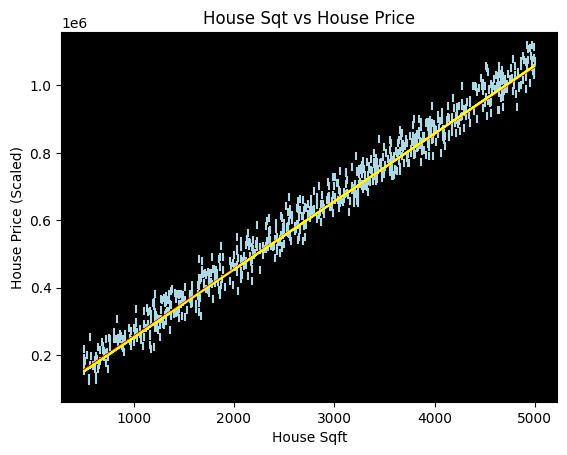

In [18]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(sft_variable,House_Price_Tar)

model.predict(sft_variable)

weight_house=model.coef_
bias=model.intercept_

plt.scatter(sft_variable,House_Price_Tar, label='Data Points',color='lightblue',marker=2)
plt.plot(sft_variable, weight_house*np.array(sft_variable)+bias , color='red', label='Slope Line')
plt.plot(sft_variable,slope1*np.array(sft_variable)+intercept, color='yellow', label='Slope Line Manual')
# Add labels and title
plt.xlabel('House Sqft')
plt.ylabel('House Price (Scaled)')
plt.title('House Sqt vs House Price')

# Show the plot
plt.rcParams['axes.facecolor'] = 'black'
plt.show()